In [1]:
import pandas as pd
import DataLoading
import torch
import matplotlib.pyplot as plt
import NN_evaluation
import numpy as np 

In [2]:
sc = "sc01"
period = "2030"
folder = "../Data/RTS24_AC_12w_ext_o_dummy/"
all_executions = DataLoading.list_executions(folder=folder,per = period,sc=sc)
te_s = 0.3
val_s = 0.4
dfs_in, dfs_out, dfs_inter = DataLoading.load_data_ext_out(folder, all_executions, period, sc, ["PowerFlow"],"SystemCosts")
dfs_inter_j = DataLoading.join_frames_inter_layer(dfs_inter)
dfs_inter_j = DataLoading.trim_columns_to_common(dfs_inter_j)
# Convert to pytorch tensors
ts_in, ts_out, ts_inter = DataLoading.split_tr_val_te_ext_out(dfs_in, dfs_out, dfs_inter_j, all_executions, te_s, val_s)
d_ft_in, d_ft_out, d_ft_inter,maxs = DataLoading.concat_and_normalize_ext_out(ts_in, ts_out, ts_inter, all_executions)

input_size = dfs_in["Network_Existing_Generation_Full"].shape[1]
inter_size = dfs_inter_j["Network_Existing_Generation_Full"].shape[1]

input_f_sc01_Network_Existing_Generation_Full_2030.csv
86
input_f_sc01_Network_Line_In_N_101_N_102_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_101_N_103_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_101_N_105_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_102_N_104_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_102_N_106_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_103_N_109_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_103_N_124_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_104_N_109_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_105_N_110_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_106_N_108_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_106_N_110_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_107_N_108_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_108_N_109_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_108_N_110_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_109_N_111_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_109_N_112_cac1_2030.csv
86
input_f_sc01_N

In [9]:
#Calculate the average output deviation
ex = all_executions[1]

base_actual = NN_evaluation.get_actual_from_dfs_out(all_executions[0],dfs_out)
ex_actual = NN_evaluation.get_actual_from_dfs_out(ex,dfs_out)

percentage_dev = (base_actual/ex_actual - 1)*100
percentage_dev_2 = (base_actual - ex_actual)/np.mean(ex_actual)

In [14]:
np.std(base_actual)/np.mean(base_actual)

1.2950200189459435

In [20]:
np.median(percentage_dev),np.mean(percentage_dev)

(10.824819038775257, 77.19401046856007)

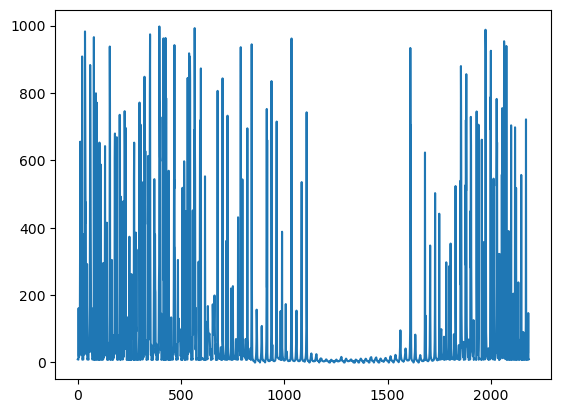

In [21]:
plt.plot(percentage_dev)

In [6]:
dfs_out

{'Network_Existing_Generation_Full':                       vTotalCCost  vTotalECost  vTotalGCost  vTotalRCost
 LoadLevel                                                               
 01-01 00:00:00+01:00          0.0     0.000000     0.000047          0.0
 01-01 01:00:00+01:00          0.0     0.000000     0.000047          0.0
 01-01 02:00:00+01:00          0.0     0.000000     0.000049          0.0
 01-01 03:00:00+01:00          0.0     0.000000     0.000053          0.0
 01-01 04:00:00+01:00          0.0     0.000486     0.000447          0.0
 ...                           ...          ...          ...          ...
 12-09 19:00:00+01:00          0.0     0.001746     0.001455          0.0
 12-09 20:00:00+01:00          0.0     0.001395     0.001174          0.0
 12-09 21:00:00+01:00          0.0     0.000511     0.000466          0.0
 12-09 22:00:00+01:00          0.0     0.000000     0.000053          0.0
 12-09 23:00:00+01:00          0.0     0.000000     0.000049          0.0
 
